In [1]:
import numpy as np
from scipy.stats import maxwell
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

Источники: https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9C%D0%B0%D0%BA%D1%81%D0%B2%D0%B5%D0%BB%D0%BB%D0%B0
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.maxwell.html#scipy.stats.maxwell

Воспользуемся распределением Максвелла, знакомое нам из физики.

Построим выборку объема 1000 и теоретическую кривую плотности распределения:

In [2]:
x = np.linspace(maxwell.ppf(0.01),
                maxwell.ppf(0.99), 100)

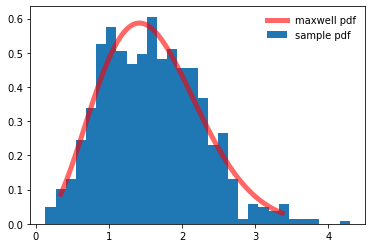

In [3]:
fig, ax = plt.subplots(1, 1)
r = maxwell.rvs(size=1000)
ax.plot(x, maxwell.pdf(x),
       'r-', lw=5, alpha=0.6, label='maxwell pdf')
ax.hist(r, bins=30, density=True, label='sample pdf')
ax.legend(loc='best', frameon=False)
plt.show()

In [4]:
n = 1000

volume_list = [5, 10, 50]

distributionSamples = np.zeros((len(volume_list), n))

for i in range(len(volume_list)):
    for j in range(n):
        distributionSampleTemp = np.array(maxwell.rvs(size=volume_list[i]))
        distributionSampleTempMean = distributionSampleTemp.mean()
        distributionSamples[i, j] = distributionSampleTempMean

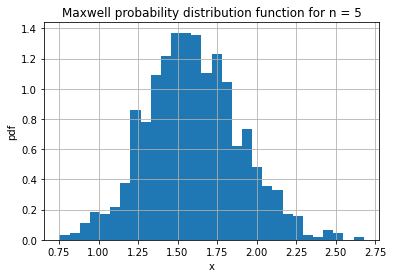

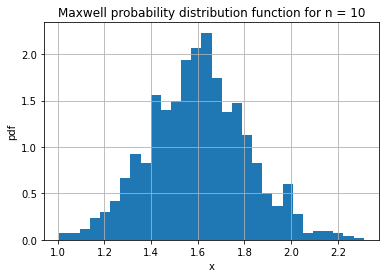

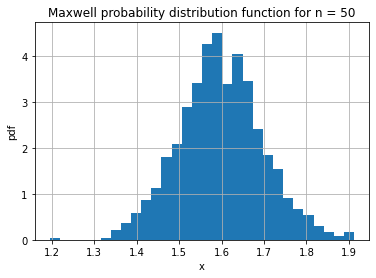

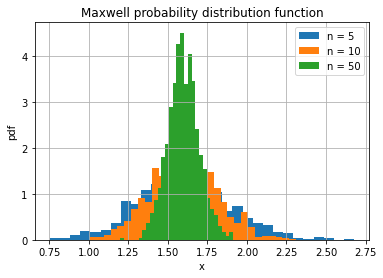

In [5]:
#гистограммы выборки
for i in range(len(volume_list)):
    plt.hist(distributionSamples[i], bins=30, density=True, histtype='stepfilled')
    plt.grid()
    #plt.axis([2, 8, 0, 2.5])
    plt.title('Maxwell probability distribution function for n = ' + str(volume_list[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.show()
    
for i in range(len(volume_list)):
    plt.hist(distributionSamples[i], bins=30, density=True, label='n = ' + str(volume_list[i]))
    plt.grid()
    #plt.axis([2, 8, 0, 2.5])
    plt.title('Maxwell probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')

Посмотрим на статистики изначального распределения. В соответствие с заданием, в дальнейшем их необходимо будет использовать для проверки ЦПТ:

In [6]:
mean, var, skew, kurt = maxwell.stats(moments='mvsk')
print(mean)
print(var)

1.5957691216057308
0.45352091052967447


Вычислим теоретические значения среднего и дисперсии в соответствие с ЦПТ:

In [7]:
SampleMean = mean
SampleVariance = np.zeros(len(volume_list))
for i in range(len(volume_list)):
    SampleVariance[i] = var/volume_list[i]
    
print ('Математическое ожидание: ', str(SampleMean))
for i in range( len(volume_list) ):
    print('Дисперсия для n = ', str(volume_list[i]), ': ', str(SampleVariance[i]))

Математическое ожидание:  1.5957691216057308
Дисперсия для n =  5 :  0.0907041821059349
Дисперсия для n =  10 :  0.04535209105296745
Дисперсия для n =  50 :  0.009070418210593489


Построим соответствующие гистограммы с теоретическими огибающими

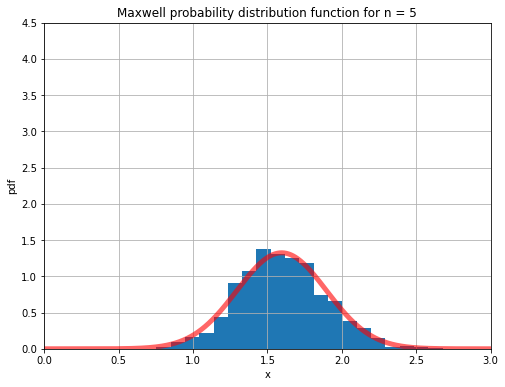

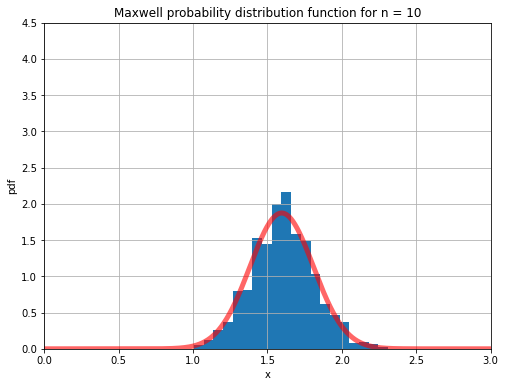

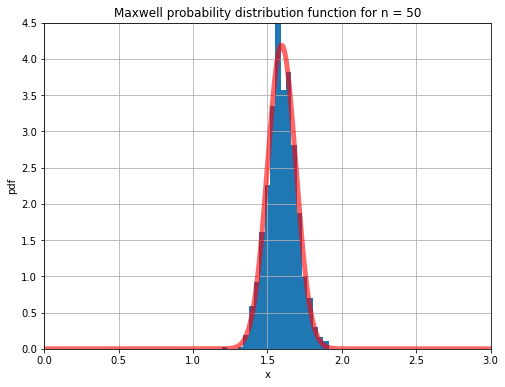

In [9]:
for i in range( len(volume_list) ):
    plt.figure(figsize=(8,6))
    plt.hist(distributionSamples[i], bins=20, density=True, histtype='stepfilled')
    plt.grid()
    plt.axis([0, 3, 0, 4.5])
    plt.title('Maxwell probability distribution function for n = '+ str(volume_list[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    
    mu = SampleMean
    sigma = np.sqrt(SampleVariance[i])
    normRv = norm(loc=mu, scale=sigma)    
    x = np.linspace(0,3,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf, '-r', lw=5, alpha=0.6)
    plt.show()

Как можно заметить, при увеличении объема выборки теоретическое распределение ложится на экспериментальное все лучше и лучше.